In [1]:
import astropy.units as u
from astroduet.duet_telescope import load_telescope_parameters
from astroduet.duet_sensitivity import src_rate, bgd_sky_qe_rate, bgd_electronics, calc_exposure
from astroduet.bbmag import bb_abmag_fluence
import numpy as np
from matplotlib import pyplot as plt
from astroduet.bbmag import bb_abmag_fluence, bb_abmag

import astroduet.config as config
from astroduet.background import background_pixel_rate


%load_ext autoreload
%autoreload 2

from astropy.visualization import quantity_support
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [11]:

# Band1
# 5-sigma limiting magnitude in 1 and 5 stacked frames.

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope()

bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()

filter_type = 'B'
for qe_loss in [1.0, 0.8, 0.77, 0.7, 0.5, 0.4]:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band1 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 20 
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band1_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=12e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('QE loss: {}'.format(qe_loss))
        print('Band1 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag1))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()






B
QE loss: 1.0
Band1 900.0 s 5-σ magnitude limit: 22.43368761357837 mag(AB)
Rates:  0.1396049959121671 ph / s 0.01753365098332382 ph / s
41.88149877365013 ph 5.260095294997146 ph

B
QE loss: 0.8
Band1 900.0 s 5-σ magnitude limit: 22.213687613578337 mag(AB)
Rates:  0.13677003159390097 ph / s 0.014026920786659056 ph / s
41.03100947817029 ph 4.208076235997717 ph

B
QE loss: 0.77
Band1 900.0 s 5-σ magnitude limit: 22.17368761357833 mag(AB)
Rates:  0.13658143942808793 ph / s 0.013500911257159342 ph / s
40.974431828426376 ph 4.050273377147803 ph

B
QE loss: 0.7
Band1 900.0 s 5-σ magnitude limit: 22.08368761357832 mag(AB)
Rates:  0.13489597773198025 ph / s 0.012273555688326674 ph / s
40.46879331959408 ph 3.682066706498002 ph

B
QE loss: 0.5
Band1 900.0 s 5-σ magnitude limit: 21.743687613578267 mag(AB)
Rates:  0.13178651228641014 ph / s 0.00876682549166191 ph / s
39.53595368592304 ph 2.630047647498573 ph

B
QE loss: 0.4
Band1 900.0 s 5-σ magnitude limit: 21.513687613578227 mag(AB)
Rates:  0.

In [13]:

# Band2
# 5-sigma limiting magnitude in 1 and 5 stacked frames.

duet = config.Telescope()
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()
filter_type = 'B'
for qe_loss in [1.0, 0.8, 0.77, 0.7, 0.5, 0.4]:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band2 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 20 
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band2_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo)        
        print('QE loss: {}'.format(qe_loss))
        print('Band2 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag2))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()







B
QE loss: 1.0
Band2 900.0 s 5-σ magnitude limit: 21.76198025121982 mag(AB)
Rates:  0.2429509268401836 ph / s 0.17922799624269026 ph / s
72.88527805205509 ph 53.768398872807076 ph

B
QE loss: 0.8
Band2 900.0 s 5-σ magnitude limit: 21.611980251219794 mag(AB)
Rates:  0.22315598919807034 ph / s 0.1433823969941522 ph / s
66.9467967594211 ph 43.01471909824566 ph

B
QE loss: 0.77
Band2 900.0 s 5-σ magnitude limit: 21.581980251219793 mag(AB)
Rates:  0.22080519414814617 ph / s 0.1380055571068715 ph / s
66.24155824444385 ph 41.401667132061455 ph

B
QE loss: 0.7
Band2 900.0 s 5-σ magnitude limit: 21.51198025121978 mag(AB)
Rates:  0.2140999669326453 ph / s 0.12545959736988319 ph / s
64.2299900797936 ph 37.637879210964954 ph

B
QE loss: 0.5
Band2 900.0 s 5-σ magnitude limit: 21.261980251219743 mag(AB)
Rates:  0.19252563502557637 ph / s 0.08961399812134513 ph / s
57.75769050767291 ph 26.884199436403538 ph

B
QE loss: 0.4
Band2 900.0 s 5-σ magnitude limit: 21.081980251219715 mag(AB)
Rates:  0.1817

In [35]:

# Band1
# 5-sigma limiting magnitude in 1 to 15 stacked frames for plotting

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope()


#tot_bgd_rate = bgd_band1 + bgd_band2
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.05
print()

limit = []
frames = []
for filter_type in ['B']:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band1

    swiftmag = 20
    for nframes in np.arange(15):
        nframes += 1
        snr = 100
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band1_rate

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('Band1 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag1))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()
        limit.append(bbmag1.value)
        frames.append(nframes)
        swiftmag -= 0.5




B
Band1 300.0 s 5-σ magnitude limit: 21.730542480741892 mag(AB)
Rates:  0.26115657255881525 ph / s 0.01753365098332382 ph / s
78.34697176764458 ph 5.260095294997146 ph

Band1 600.0 s 5-σ magnitude limit: 22.18054248074191 mag(AB)
Rates:  0.1725444363937269 ph / s 0.01753365098332382 ph / s
51.76333091811807 ph 5.260095294997146 ph

Band1 900.0 s 5-σ magnitude limit: 22.430542480741916 mag(AB)
Rates:  0.13705691757212424 ph / s 0.01753365098332382 ph / s
41.11707527163727 ph 5.260095294997146 ph

Band1 1200.0 s 5-σ magnitude limit: 22.58054248074193 mag(AB)
Rates:  0.11937158495693061 ph / s 0.01753365098332382 ph / s
35.811475487079186 ph 5.260095294997146 ph

Band1 1500.0 s 5-σ magnitude limit: 22.730542480741935 mag(AB)
Rates:  0.10396830417283501 ph / s 0.01753365098332382 ph / s
31.190491251850503 ph 5.260095294997146 ph

Band1 1800.0 s 5-σ magnitude limit: 22.830542480741943 mag(AB)
Rates:  0.094820220355077 ph / s 0.01753365098332382 ph / s
28.4460661065231 ph 5.260095294997146

In [36]:

# Band2
# 5-sigma limiting magnitude in 1 to 15 stacked frames for plotting

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope()


#tot_bgd_rate = bgd_band1 + bgd_band2
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.05
print()

limit2 = []
frames = []
for filter_type in ['B']:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band2

    swiftmag = 20 


    for nframes in np.arange(15):
        nframes += 1
        snr = 100
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band2_rate

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('Band2 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag2))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()
        limit2.append(bbmag2.value)
        frames.append(nframes)
        swiftmag -= 0.5




B
Band2 300.0 s 5-σ magnitude limit: 21.141980251219504 mag(AB)
Rates:  0.4300496120314549 ph / s 0.17922799624269026 ph / s
129.01488360943648 ph 53.768398872807076 ph

Band2 600.0 s 5-σ magnitude limit: 21.541980251219517 mag(AB)
Rates:  0.29752164063502995 ph / s 0.17922799624269026 ph / s
89.25649219050898 ph 53.768398872807076 ph

Band2 900.0 s 5-σ magnitude limit: 21.791980251219524 mag(AB)
Rates:  0.23632983959789391 ph / s 0.17922799624269026 ph / s
70.89895187936817 ph 53.768398872807076 ph

Band2 1200.0 s 5-σ magnitude limit: 21.941980251219537 mag(AB)
Rates:  0.2058346855099239 ph / s 0.17922799624269026 ph / s
61.75040565297717 ph 53.768398872807076 ph

Band2 1500.0 s 5-σ magnitude limit: 22.091980251219542 mag(AB)
Rates:  0.1792745166292032 ph / s 0.17922799624269026 ph / s
53.782354988760964 ph 53.768398872807076 ph

Band2 1800.0 s 5-σ magnitude limit: 22.19198025121955 mag(AB)
Rates:  0.16350030238612337 ph / s 0.17922799624269026 ph / s
49.05009071583701 ph 53.7683988

In [37]:

# Band1
# 5-sigma limiting magnitude in 1 to 15 stacked frames for plotting

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope(config='minimum_mass_75')


#tot_bgd_rate = bgd_band1 + bgd_band2
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.05
print()

limit_75 = []
frames = []
for filter_type in ['B']:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band1

    swiftmag = 20 


    for nframes in np.arange(15):
        nframes += 1
        snr = 100
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band1_rate

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('Band1 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag1))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()
        limit_75.append(bbmag1.value)
        frames.append(nframes)
        swiftmag -= 0.5





B
Band1 300.0 s 5-σ magnitude limit: 21.580542480741894 mag(AB)
Rates:  0.29984786456111695 ph / s 0.01753365098332382 ph / s
89.95435936833509 ph 5.260095294997146 ph

Band1 600.0 s 5-σ magnitude limit: 22.030542480741904 mag(AB)
Rates:  0.19810751951459715 ph / s 0.01753365098332382 ph / s
59.43225585437914 ph 5.260095294997146 ph

Band1 900.0 s 5-σ magnitude limit: 22.280542480741918 mag(AB)
Rates:  0.15736239626163404 ph / s 0.01753365098332382 ph / s
47.20871887849021 ph 5.260095294997146 ph

Band1 1200.0 s 5-σ magnitude limit: 22.430542480741924 mag(AB)
Rates:  0.13705691757212338 ph / s 0.01753365098332382 ph / s
41.11707527163701 ph 5.260095294997146 ph

Band1 1500.0 s 5-σ magnitude limit: 22.580542480741936 mag(AB)
Rates:  0.11937158495692979 ph / s 0.01753365098332382 ph / s
35.81147548707894 ph 5.260095294997146 ph

Band1 1800.0 s 5-σ magnitude limit: 22.680542480741945 mag(AB)
Rates:  0.10886817939181401 ph / s 0.01753365098332382 ph / s
32.6604538175442 ph 5.260095294997

In [38]:

# Band2
# 5-sigma limiting magnitude in 1 to 15 stacked frames for plotting

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope(config='minimum_mass_75')


#tot_bgd_rate = bgd_band1 + bgd_band2
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.05
print()

limit2_75 = []
frames = []
for filter_type in ['B']:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band2
    swiftmag = 20 


    for nframes in np.arange(15):
        nframes += 1
        snr = 100
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band2_rate

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('Band2 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag2))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()
        limit2_75.append(bbmag2.value)
        frames.append(nframes)
        swiftmag -= 0.5






B
Band2 300.0 s 5-σ magnitude limit: 20.9919802512195 mag(AB)
Rates:  0.49376301947724693 ph / s 0.17922799624269026 ph / s
148.12890584317407 ph 53.768398872807076 ph

Band2 600.0 s 5-σ magnitude limit: 21.39198025121951 mag(AB)
Rates:  0.34160054916880556 ph / s 0.17922799624269026 ph / s
102.48016475064166 ph 53.768398872807076 ph

Band2 900.0 s 5-σ magnitude limit: 21.641980251219525 mag(AB)
Rates:  0.2713429612020989 ph / s 0.17922799624269026 ph / s
81.40288836062966 ph 53.768398872807076 ph

Band2 1200.0 s 5-σ magnitude limit: 21.79198025121953 mag(AB)
Rates:  0.23632983959789228 ph / s 0.17922799624269026 ph / s
70.89895187936769 ph 53.768398872807076 ph

Band2 1500.0 s 5-σ magnitude limit: 21.89198025121954 mag(AB)
Rates:  0.21553537537651957 ph / s 0.17922799624269026 ph / s
64.66061261295587 ph 53.768398872807076 ph

Band2 1800.0 s 5-σ magnitude limit: 21.991980251219548 mag(AB)
Rates:  0.19657059860802917 ph / s 0.17922799624269026 ph / s
58.97117958240875 ph 53.768398872

In [40]:

# Band1
# 5-sigma limiting magnitude in 1 to 15 stacked frames for plotting

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope(config='minimum_mass_75')


#tot_bgd_rate = bgd_band1 + bgd_band2
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.05
print()

limit_75_qe = []
frames = []
for filter_type in ['B']:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band1*0.5

    swiftmag = 20 


    for nframes in np.arange(15):
        nframes += 1
        snr = 100
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band1_rate*0.5

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('Band1 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag1))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()
        limit_75_qe.append(bbmag1.value)
        frames.append(nframes)
        swiftmag -= 0.5






B
Band1 300.0 s 5-σ magnitude limit: 20.93054248074188 mag(AB)
Rates:  0.27281670829712046 ph / s 0.00876682549166191 ph / s
81.84501248913614 ph 2.630047647498573 ph

Band1 600.0 s 5-σ magnitude limit: 21.330542480741894 mag(AB)
Rates:  0.1887430481841029 ph / s 0.00876682549166191 ph / s
56.62291445523087 ph 2.630047647498573 ph

Band1 900.0 s 5-σ magnitude limit: 21.580542480741908 mag(AB)
Rates:  0.14992393228055642 ph / s 0.00876682549166191 ph / s
44.97717968416693 ph 2.630047647498573 ph

Band1 1200.0 s 5-σ magnitude limit: 21.730542480741914 mag(AB)
Rates:  0.13057828627940507 ph / s 0.00876682549166191 ph / s
39.17348588382152 ph 2.630047647498573 ph

Band1 1500.0 s 5-σ magnitude limit: 21.880542480741926 mag(AB)
Rates:  0.11372893298822216 ph / s 0.00876682549166191 ph / s
34.118679896466645 ph 2.630047647498573 ph

Band1 1800.0 s 5-σ magnitude limit: 21.980542480741935 mag(AB)
Rates:  0.10372201963363965 ph / s 0.00876682549166191 ph / s
31.116605890091897 ph 2.63004764749

In [41]:

# Band2
# 5-sigma limiting magnitude in 1 to 15 stacked frames for plotting

# Account for the fact that you're co-adding the two frames here:
duet = config.Telescope(config='minimum_mass_75')


#tot_bgd_rate = bgd_band1 + bgd_band2
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.05
print()

limit2_75_qe = []
frames = []
for filter_type in ['B']:
    print(filter_type)
    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band2 * 0.5
    swiftmag = 20 


    for nframes in np.arange(15):
        nframes += 1
        snr = 100
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band2_rate * 0.5

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo) 
        
        print('Band2 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag2))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()
        limit2_75_qe.append(bbmag2.value)
        frames.append(nframes)
        swiftmag -= 0.5







B
Band2 300.0 s 5-σ magnitude limit: 20.49198025121949 mag(AB)
Rates:  0.391280824129269 ph / s 0.08961399812134513 ph / s
117.3842472387807 ph 26.884199436403538 ph

Band2 600.0 s 5-σ magnitude limit: 20.891980251219504 mag(AB)
Rates:  0.27070019245931065 ph / s 0.08961399812134513 ph / s
81.21005773779319 ph 26.884199436403538 ph

Band2 900.0 s 5-σ magnitude limit: 21.14198025121952 mag(AB)
Rates:  0.21502480601572468 ph / s 0.08961399812134513 ph / s
64.5074418047174 ph 26.884199436403538 ph

Band2 1200.0 s 5-σ magnitude limit: 21.291980251219524 mag(AB)
Rates:  0.18727877697706444 ph / s 0.08961399812134513 ph / s
56.18363309311933 ph 26.884199436403538 ph

Band2 1500.0 s 5-σ magnitude limit: 21.391980251219533 mag(AB)
Rates:  0.17080027458439942 ph / s 0.08961399812134513 ph / s
51.24008237531982 ph 26.884199436403538 ph

Band2 1800.0 s 5-σ magnitude limit: 21.541980251219545 mag(AB)
Rates:  0.14876082031751103 ph / s 0.08961399812134513 ph / s
44.62824609525331 ph 26.8841994364

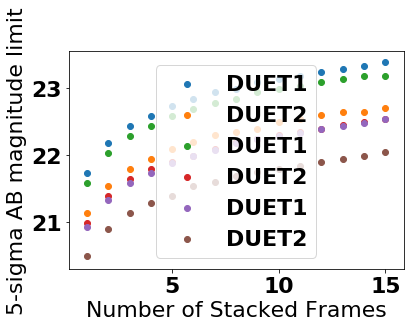

In [43]:
# Plot results
plt.scatter(frames, limit, label= 'DUET1')
plt.scatter(frames, limit2, label = 'DUET2')

plt.scatter(frames, limit_75, label= 'DUET1')
plt.scatter(frames, limit2_75, label = 'DUET2')

plt.scatter(frames, limit_75_qe, label= 'DUET1')
plt.scatter(frames, limit2_75_qe, label = 'DUET2')


plt.ylabel('5-sigma AB magnitude limit')
plt.xlabel('Number of Stacked Frames')
plt.legend()
plt.show()

f = open('DUET_limits.txt', 'w')
for fr, l1, l2, l1_75, l2_75, l1_75_qe, l2_75_qe in zip(frames, limit, limit2, limit_75, limit2_75, limit_75_qe, limit2_75_qe):
    f.write('{} {} {} {} {} {} {}\n'.format(fr, l1, l2, l1_75, l2_75, l1_75_qe, l2_75_qe))
f.close()

In [16]:
def calc_margin(ab1, ab2):
    dmag = (ab1 - ab2)
    flux_ratio = 10**(0.4*dmag)
    margin = flux_ratio - 1.0
    return margin


In [30]:

# Band1
# 5-sigma limiting magnitude in 1 and 5 stacked frames.
margin_target = 0.3
cbe = 22.43


duet = config.Telescope()
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()
filter_type = 'B'

margin = 0.
qe_loss = 0.9
while(np.abs(margin - margin_target) > 0.015):
    qe_loss -= 0.01

    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band1 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 21
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band1_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo)        
        print('QE loss: {}'.format(qe_loss))
        print('Band1 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag1))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()
    margin = calc_margin(cbe, bbmag1.value)
    print(margin)
print(qe_loss)
print(1 - qe_loss)






QE loss: 0.89
Band1 900.0 s 5-σ magnitude limit: 22.290542480742065 mag(AB)
Rates:  0.13876852333538325 ph / s 0.0156049493751582 ph / s
41.63055700061498 ph 4.68148481254746 ph

0.13705902003101866
QE loss: 0.88
Band1 900.0 s 5-σ magnitude limit: 22.280542480742067 mag(AB)
Rates:  0.13847890871021887 ph / s 0.015429612865324962 ph / s
41.54367261306566 ph 4.628883859597488 ph

0.14758009760583013
QE loss: 0.87
Band1 900.0 s 5-σ magnitude limit: 22.270542480742062 mag(AB)
Rates:  0.13817205375066907 ph / s 0.015254276355491724 ph / s
41.45161612520072 ph 4.576282906647517 ph

0.15819852551285263
QE loss: 0.86
Band1 900.0 s 5-σ magnitude limit: 22.260542480742064 mag(AB)
Rates:  0.13784766420664882 ph / s 0.015078939845658484 ph / s
41.35429926199465 ph 4.523681953697545 ph

0.16891520452360487
QE loss: 0.85
Band1 900.0 s 5-σ magnitude limit: 22.25054248074206 mag(AB)
Rates:  0.13750544185879898 ph / s 0.014903603335825246 ph / s
41.251632557639695 ph 4.471081000747573 ph

0.179731043

In [31]:

# Band2
# 5-sigma limiting magnitude in 1 and 5 stacked frames.
margin_target = 0.3
cbe = 21.76


duet = config.Telescope()
bandone = duet.bandpass1
bandtwo = duet.bandpass2
exposure = 300*u.s
print()
siglimit=5
dmag = 0.01
print()
filter_type = 'B'

margin = 0.
qe_loss = 0.8
while(np.abs(margin - margin_target) > 0.015):
    qe_loss -= 0.01

    [bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi=True, filter_type=filter_type)
    tot_bgd_rate = bgd_band2 * qe_loss

    for nframes in [3]:
        snr = 100
        swiftmag = 21
        while snr > siglimit:
            swiftmag += dmag
            band1_fluence, band2_fluence = bb_abmag_fluence(duet =duet, swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, filter_type=filter_type)
            band1_rate = duet.fluence_to_rate(band1_fluence)
            band2_rate = duet.fluence_to_rate(band2_fluence)
            src_rate = band2_rate * qe_loss

            snr = duet.calc_snr(exposure, src_rate, tot_bgd_rate, nint=nframes)
        bbmag1, bbmag2 = bb_abmag(swiftmag=swiftmag*u.ABmag, bbtemp=15e3*u.K, bandone = bandone, bandtwo=bandtwo)        
        print('QE loss: {}'.format(qe_loss))
        print('Band2 {} {}-σ magnitude limit: {}'.format(nframes*exposure, siglimit, bbmag2))
        print('Rates: ', src_rate, tot_bgd_rate)
        print(src_rate*exposure, tot_bgd_rate*exposure)
        print()
    margin = calc_margin(cbe, bbmag2.value)
    print(margin)
print(qe_loss)
print(1 - qe_loss)






QE loss: 0.79
Band2 900.0 s 5-σ magnitude limit: 21.60198025121964 mag(AB)
Rates:  0.22240556581668844 ph / s 0.1415901170317253 ph / s
66.72166974500654 ph 42.477035109517594 ph

0.15666581291451087
QE loss: 0.78
Band2 900.0 s 5-σ magnitude limit: 21.591980251219635 mag(AB)
Rates:  0.22162214957013832 ph / s 0.1397978370692984 ph / s
66.48664487104149 ph 41.939351120789524 ph

0.1673683099102099
QE loss: 0.77
Band2 900.0 s 5-σ magnitude limit: 21.581980251219637 mag(AB)
Rates:  0.2208051941481779 ph / s 0.1380055571068715 ph / s
66.24155824445337 ph 41.401667132061455 ph

0.1781698358913384
QE loss: 0.76
Band2 900.0 s 5-σ magnitude limit: 21.57198025121963 mag(AB)
Rates:  0.21995414595535967 ph / s 0.1362132771444446 ph / s
65.9862437866079 ph 40.86398314333338 ph

0.18907130716183262
QE loss: 0.75
Band2 900.0 s 5-σ magnitude limit: 21.561980251219634 mag(AB)
Rates:  0.21906844402300524 ph / s 0.1344209971820177 ph / s
65.72053320690158 ph 40.32629915460531 ph

0.20007364850405307
Q